# 3337. Total Characters in String After Transformations II

You are given a string s consisting of lowercase English letters, an integer t representing the number of transformations to perform, and an array nums of size 26. In one transformation, every character in s is replaced according to the following rules:

Replace s[i] with the next nums[s[i] - 'a'] consecutive characters in the alphabet. For example, if s[i] = 'a' and nums[0] = 3, the character 'a' transforms into the next 3 consecutive characters ahead of it, which results in "bcd".
The transformation wraps around the alphabet if it exceeds 'z'. For example, if s[i] = 'y' and nums[24] = 3, the character 'y' transforms into the next 3 consecutive characters ahead of it, which results in "zab".
Return the length of the resulting string after exactly t transformations.

Since the answer may be very large, return it modulo 109 + 7.

 

Example 1:

Input: s = "abcyy", t = 2, nums = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2]

Output: 7

Explanation:

First Transformation (t = 1):

'a' becomes 'b' as nums[0] == 1
'b' becomes 'c' as nums[1] == 1
'c' becomes 'd' as nums[2] == 1
'y' becomes 'z' as nums[24] == 1
'y' becomes 'z' as nums[24] == 1
String after the first transformation: "bcdzz"
Second Transformation (t = 2):

'b' becomes 'c' as nums[1] == 1
'c' becomes 'd' as nums[2] == 1
'd' becomes 'e' as nums[3] == 1
'z' becomes 'ab' as nums[25] == 2
'z' becomes 'ab' as nums[25] == 2
String after the second transformation: "cdeabab"
Final Length of the string: The string is "cdeabab", which has 7 characters.

Example 2:

Input: s = "azbk", t = 1, nums = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]

Output: 8

Explanation:

First Transformation (t = 1):

'a' becomes 'bc' as nums[0] == 2
'z' becomes 'ab' as nums[25] == 2
'b' becomes 'cd' as nums[1] == 2
'k' becomes 'lm' as nums[10] == 2
String after the first transformation: "bcabcdlm"
Final Length of the string: The string is "bcabcdlm", which has 8 characters.

 

Constraints:

1 <= s.length <= 105
s consists only of lowercase English letters.
1 <= t <= 109
nums.length == 26
1 <= nums[i] <= 25

## Solution:
Model the problem as matrix multiplication:

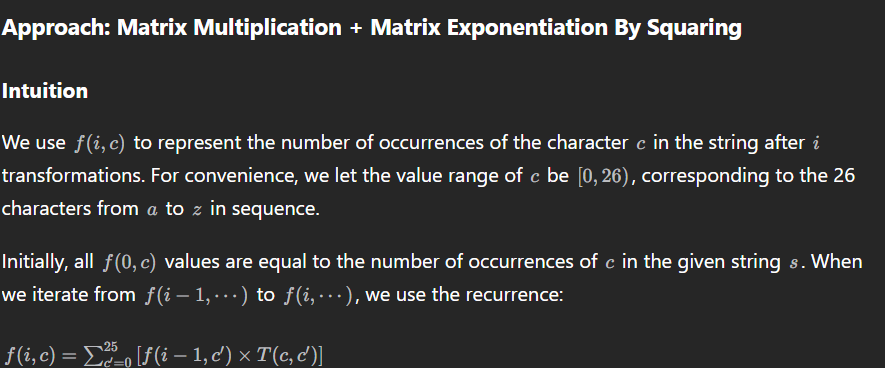

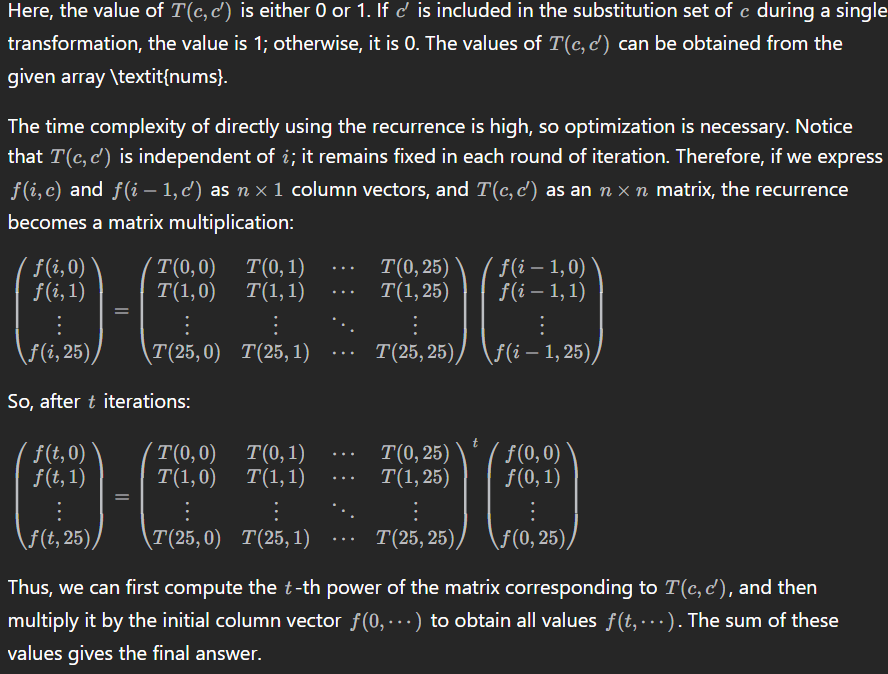

In [69]:
import numpy as np


529 / 536 testcases passed

In [39]:
s="mppgvcssluzhipednraxbdfbyn"
t=3719
nums=[5,3,8,1,4,2,2,4,5,2,8,5,8,2,6,10,8,1,4,1,7,4,2,4,7,5]
MOD=10**9+7
f=[0]*26
#map frequency: f[i]=occurence of corresponding alphabet:a-0,b-1,...,z-25
f=np.array(f)
for i in range(len(s)):
    f[ord(s[i])-ord('a')]+=1
#Build a transformation 26x26 matrix:
T=np.zeros([26,26])
#T[new_char,old_char]=1 if occurence of old char contributes to occurence of new char in the current transformation, otherwise 0
#This will come from nums[i] corresponding to the old_char
for j in range(26):
    for k in range(nums[j]):
        T[(k+j+1)%26,j]=1
T_t=np.identity(26,dtype=int)
for _ in range(t):
    T_t=(T_t@T)%MOD #Do matrix multiplication with modulo
f_new=np.matmul(T_t,f)
int(sum(f_new)%MOD)


467065288

## Accepted Solution:
Above solution needs matrix binary exponentiation

In [76]:
s="mppgvcssluzhipednraxbdfbyn"
t=3719
nums=[5,3,8,1,4,2,2,4,5,2,8,5,8,2,6,10,8,1,4,1,7,4,2,4,7,5]
MOD=10**9+7
f=[0]*26
#map frequency: f[i]=occurence of corresponding alphabet:a-0,b-1,...,z-25
for i in range(len(s)):
    f[ord(s[i])-ord('a')]+=1
#Build a transformation 26x26 matrix:
T=[[0 for _ in range(26)] for _ in range(26)]
#T[new_char,old_char]=1 if occurence of old char contributes to occurence of new char in the current transformation, otherwise 0
#This will come from nums[i] corresponding to the old_char
for j in range(26):
    for k in range(nums[j]):
        T[(k+j+1)%26][j]=1

#Matrix Multiplication under Modulo
def matrix_mult(A, B):
    result = [[0] * 26 for _ in range(26)]
    for i in range(26):
        for j in range(26):
            for k in range(26):
                result[i][j] = (result[i][j] + A[i][k] * B[k][j]) % MOD
    return result

#Matrix Binary Exponentiation
def matrix_pow(mat, power):
    # Initialize result as identity matrix
    result = [[1 if i == j else 0 for j in range(26)] for i in range(26)]
    while power > 0:
        if power % 2 == 1:
            result = matrix_mult(result, mat)
        mat = matrix_mult(mat, mat)
        power //= 2
    return result

T_t=matrix_pow(T,t)
#Multiplication of matrix with vector
f_new = [0] * 26
for i in range(26):
    for j in range(26):
        f_new[i] = (f_new[i] + T_t[i][j] * f[j]) % MOD

sum(f_new)%MOD

467065288